Camera Calibration
------------------

**1. Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.**
The code to compute the camera matrix and distortion coefficients can be found in calibrate.py.
I computed the camera matrix and distortion coefficients using the following process:
1. Import the images
2. Find chessboard corners using: cv2.findChessboardCorners(gray, (9, 6), None)
3. Calculate camera matrix and distortion coefficients using: cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1],None,None)
4. Save coeffients to camera_coefficients.pickle


Pipeline (Images)
----------

**1. Provide an example of a distortion-corrected image.**

The images are shown here but also saved as "Distortion_Uncorrected.png" and "Distortion_Corrected.png" in the output_images folder.

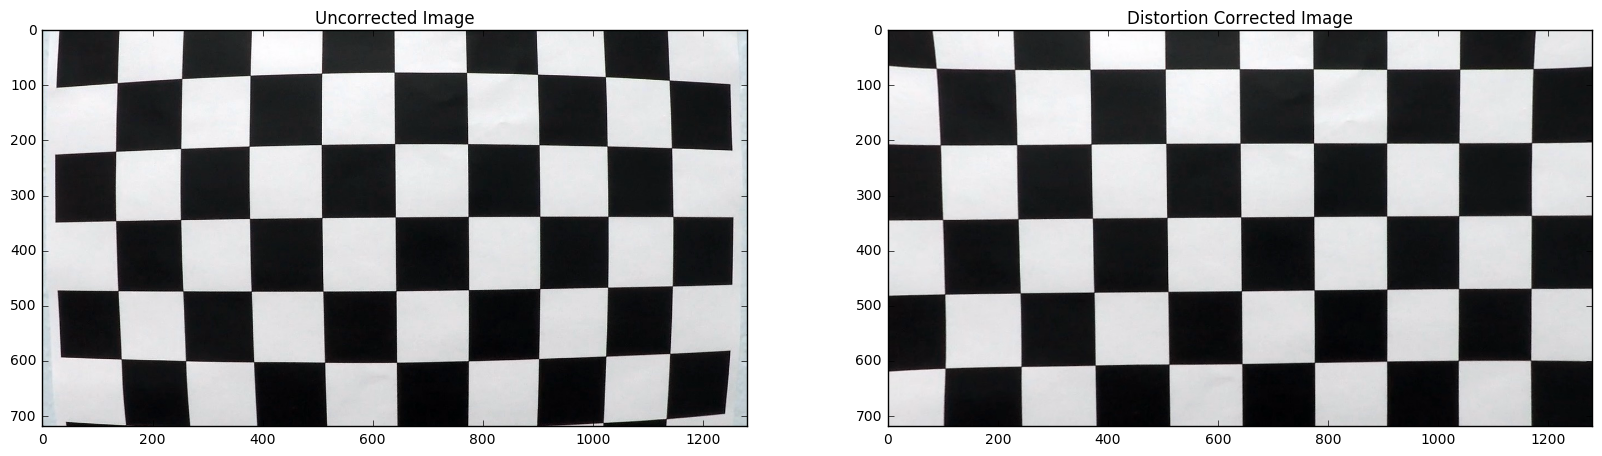

In [1]:
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
# load coefficients
with open('camera_coefficients.pickle', 'rb') as f:  # Python 3: open(..., 'wb')
    mtx, dist, rvecs, tvecs = pickle.load(f)
name = "./camera_cal/calibration1.jpg"
img = cv2.imread(name)
cv2.imwrite('./output_images/Distortion_Uncorrected.png',img)
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('./output_images/Distortion_Corrected.png',dst)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Uncorrected Image')
plt.subplot(1,2,2)
plt.imshow(dst)
plt.title('Distortion Corrected Image')

**2. Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image. Provide an example of a binary image result.**
The code that uses color transforms and gradients is in the functions "hls_select" and "sabel_thresh". in detect_lanelines.py.The function "sabel_thresh" combutes binary images using a variety of different threshold tecniques including:
    - Axis-specific gradient thresholding (lines 52-60 in function "sabel_thresh" of detect_lanelines.py): This thresholding only selects regions of the image that have a gradient in x or y within threshold limits
    
    - Gradient magnitude thresholding (lines 62-70 in function "sabel_thresh" of detect_lanelines.py): This thresholding computes the total gradient (sqrt(grad_x^2, grad_y^2)) and only selects the regio of the images whos total gradient is within thresholds
    
    -  Gradient direction thresholding (lines 73-78 in function "sabel_thresh" of detect_lanelines.py): this thresholding computes the gradient direction (np.arctan2(grad_y/grad_x)) and only seleccts regions of the image who's gradient direction is within a threshold.
    
In addition "hls_select" function on lines 82 to 87 of detect_lanelines.py coverts the color representation to hls and only selects regions of the image who's saturation value is within a threwhold

All of these threshold tecniques were applied to the image seperately, and the binary images are combined to find to accurately select the regions of interest. Specifically, they are combined as follows:

(sabel_x & sabel_y) | (sabel_mag & sabel_dir) | hls_select

Please see the image below for the result of this thresholding. These are also saved with in the output_images folder with the ending "_binary.png"


./output_images/straight_lines1_binary.png


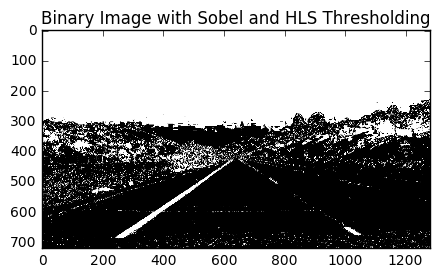

./output_images/test1_binary.png


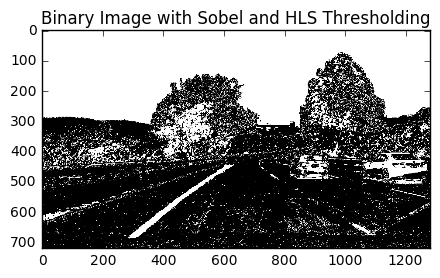

./output_images/test3_binary.png


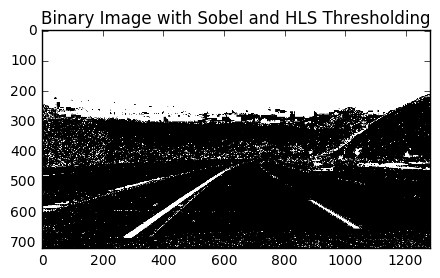

./output_images/test4_binary.png


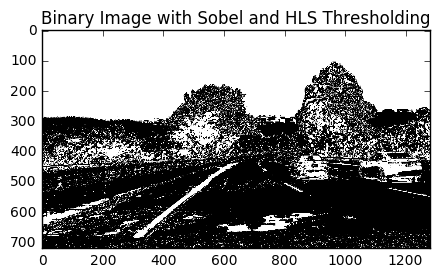

In [2]:
exec(open("./detect_lanelines.py").read())
def plot_binary(name):
    img = cv2.imread(name)
    distortion_correct_img, binary_img, warped_binary_img = preprocess(img)
    output_name = "./output_images/" + name[14:-4] + '_binary.png'
    print(output_name)
    cv2.imwrite(output_name,binary_img)
    
    plt.figure(figsize = (5,5))
    plt.imshow(binary_img, cmap='gray')
    plt.title('Binary Image with Sobel and HLS Thresholding')
    plt.show(block = False)
name = "./test_images/straight_lines1.jpg"
plot_binary(name)
name = "./test_images/test1.jpg"
plot_binary(name)
name = "./test_images/test3.jpg"
plot_binary(name)
name = "./test_images/test4.jpg"
plot_binary(name)

**3. Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.**

The code that computes the perspective transform is in a function called "warper" on lines 34-42 of detect_lanelines.py. The approach I took here is to look at the straight laneline examples in test_images.py and manually chose points that followed the lanelines (with some margin for turning lanelines)since I know these to be parallel. The warp src and dst region definition is on lines 20-33 of detecet_lanelines.py. The result of this warping can be seen in the following images and are also saved in the output_images directory with the ending "warped_binary.png"


./output_images/straight_lines1_warped_binary.png


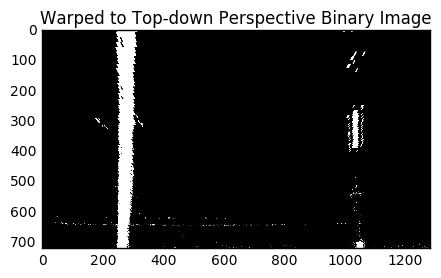

./output_images/test1_warped_binary.png


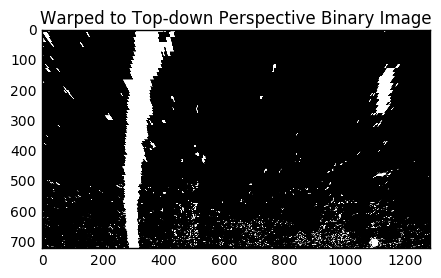

./output_images/test3_warped_binary.png


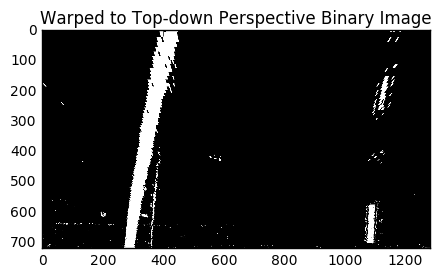

./output_images/test4_warped_binary.png


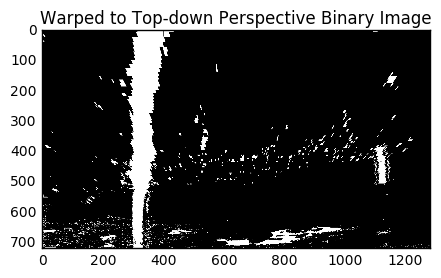

In [3]:
exec(open("./detect_lanelines.py").read())
def plot_warped(name):
    img = cv2.imread(name)
    distortion_correct_img, binary_img, warped_binary_img = preprocess(img)
    output_name = "./output_images/" + name[14:-4] + '_warped_binary.png'
    print(output_name)
    cv2.imwrite(output_name,warped_binary_img)
    plt.figure(figsize = (5,5))
    plt.imshow(warped_binary_img, cmap='gray')
    plt.title('Warped to Top-down Perspective Binary Image')
    plt.show(block = False)
name = "./test_images/straight_lines1.jpg"
plot_warped(name)
name = "./test_images/test1.jpg"
plot_warped(name)
name = "./test_images/test3.jpg"
plot_warped(name)
name = "./test_images/test4.jpg"
plot_warped(name)

**4. Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?**
    I use two different methods to identify lane-line pixels:
    
1) Histogram method("find_line_pixels_histogram" function on lines 188-253 of detect_lanelines.py): in this method, a histogram of the image is computed to detect the two highest peaks which identify where the lanelines (left and right)_are likely to be. These peaks are the center of the initial boxes on the bottom of the image that are assumed to contain laneline pixels. Subsequent boxes that are assumed to contain pixels are stacked ontop of this one with the center of the box being the average position of all of the white pixels in the previous box. This can be visualized here and are also saved in the output_images directory with the following ending "_detected_laneline_pixels.png"

./output_images/straight_lines1_detected_laneline_pixels.png


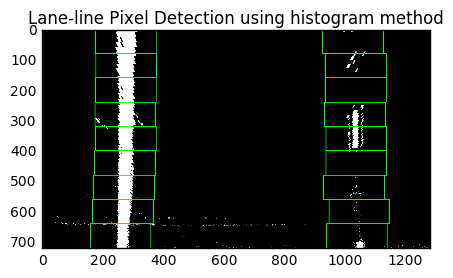

./output_images/test1_detected_laneline_pixels.png


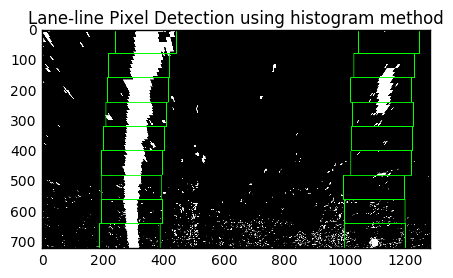

./output_images/test3_detected_laneline_pixels.png


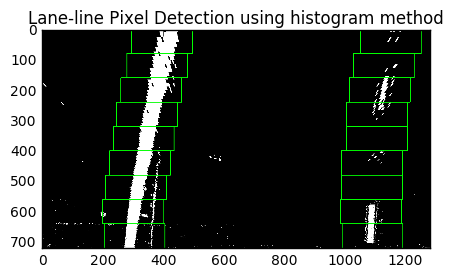

./output_images/test4_detected_laneline_pixels.png


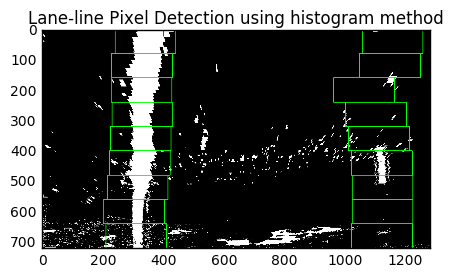

In [4]:
exec(open("./detect_lanelines.py").read())
def plot_hist_detection(name):
    img = cv2.imread(name)
    distortion_correct_img, binary_img, warped_binary_img = preprocess(img)
    x1,x2,x3,x4, sliding_box_img = find_line_pixels_histogram(warped_binary_img, visualize = False)
    
    output_name = "./output_images/" + name[14:-4] + '_detected_laneline_pixels.png'
    print(output_name)
    cv2.imwrite(output_name,sliding_box_img)
    
    plt.figure(figsize = (5,5))
    plt.imshow(sliding_box_img, cmap='gray')
    plt.title('Lane-line Pixel Detection using histogram method')
    plt.show(block = False)
name = "./test_images/straight_lines1.jpg"
plot_hist_detection(name)
name = "./test_images/test1.jpg"
plot_hist_detection(name)
name = "./test_images/test3.jpg"
plot_hist_detection(name)
name = "./test_images/test4.jpg"
plot_hist_detection(name)

2) The second method to detect laneline is in the function "find_line_pixels_from_prev" on lines 255 to 269 of detect_lanelines.py. This method assumes that lanelines do not change drastically from frame to frame so the pixels in the current frame must be close to the lanelines detected in the previous frame. Essentially, this function assumes that the pixels are within a "margin" (50 pixels in the code) of the previously detected lanelines.

In the initial frame, the histogram method is used to detect the laneline pixels since there is no previous data to use the second method. In subsequent frames the second method where the laneline pixels are assumed to be within a certain distance to the previous pixels is used. If the second method fails to provide realistic lanelines (as indicated by how parallel the lines are - see the "check_if_fit_good" function on lines 298-312 of detect_lanelines.py), the histogram method is used to re-detect where the laneline pixels are.


Once the lane-line pixels are identified, the least squares method is used to fit a second order polynomial to these pixels. This can be seen on lines 281 and 282 in the "process_lane_pixels" function in detect_lanelines.py

**5. Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.**


Radius of Curvature:

The code can be found in the "process_lane_pixels" function on lines 276 to 285 in detect_lanelines.py.

By assuming a certain distance per pixel in the x and y directions (0.0416 meters/pixel and 0.00528 meters/pixel in the y and x directions, respectively) the 2nd order polynomials are recomputed with the units of meters instead of pixels. Then I computed the radius of the curves with the following function evaluated at the bottom of the image:

(1+(2Ay+B)^2 )^(3/2) / abs(2A) where the 2nd order polynomial representing the laneline is f(y) Ay^2 + By + C


Distance from Center:

The code can be found in the "process_lane_pixels" function on lines 287 to 292 in detect_lanelines.py.

The location of the center of the car is assumed to be at the center of the image. The location of the center of the laneline is the average of the left laneline position and right laneline position evaluated at the bottom of the image. The distance from center is the difference of these two metrics

**6. Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.**

The following images show the end result of the laneline detection and are also saved in the output_images directory with the following ending "_detected_lanes.png"

./output_images/straight_lines1_detected_lanes.png


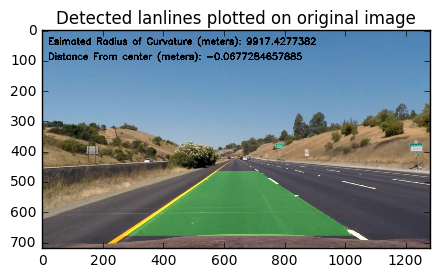

./output_images/test1_detected_lanes.png


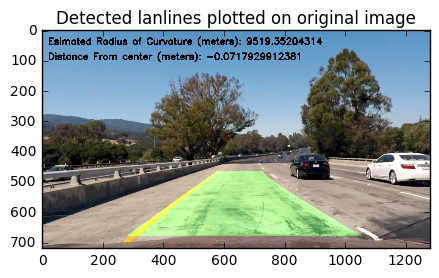

./output_images/test3_detected_lanes.png


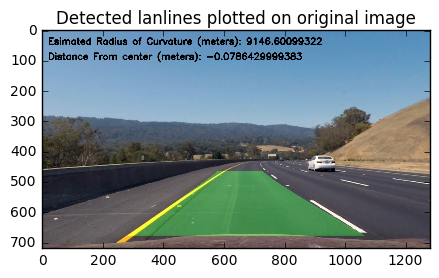

./output_images/test4_detected_lanes.png


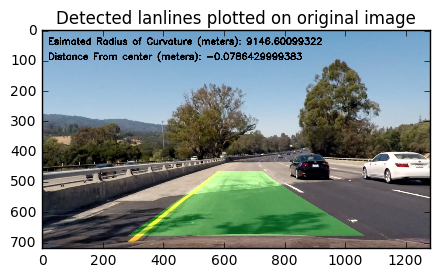

In [5]:
def plot_lanelines(name):
    img = cv2.imread(name)
    laneline_img = detect_lines(img)
    output_name = "./output_images/" + name[14:-4] + '_detected_lanes.png'
    print(output_name)
    cv2.imwrite(output_name,laneline_img)
    
    plt.figure(figsize = (5,5))
    plt.imshow(cv2.cvtColor(laneline_img, cv2.COLOR_BGR2RGB))
    plt.title('Detected lanlines plotted on original image')
    plt.show(block = False)
name = "./test_images/straight_lines1.jpg"
plot_lanelines(name)
name = "./test_images/test1.jpg"
plot_lanelines(name)
name = "./test_images/test3.jpg"
plot_lanelines(name)
name = "./test_images/test4.jpg"
plot_lanelines(name)

Pipeline (video)
--------

**1. Provide a link to your final video output. Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!)**

A video of the pipeline working on the project_video can be seen here:
https://youtu.be/NKjfb1dlwNc

Discussion
--------

**1. Briefly discuss any problems / issues you faced in your implementation of this project. Where will your pipeline likely fail? What could you do to make it more robust?**

Despite the filtering and masking tecniques used, the detected lanelines still moved around some. In order to smooth out the detected lanelines, I used a first order filter on the second order polynomial coefficients from frame to frame. This can be seen on lines 367-275 of the detect_lanelines.py

There are a number of assumptions I make on in my pipeline that are not necessarily true in general:
I assume that the road will alsways be in the center of the camera, In the event that the car is switching lanes, this assumption quickly falls apart. to makeit more robust, I might track the lines and change my mask to so that I am always masking the area where the lines are expected to be.

One of the challenges of this project is that there are shadows on the road that create a high enough gradient in the images to be detected as lines. Many of these detected lines are filtered out the laneline-pixel detection tecniques, but some still remain. Doing some quick research, one way that would appear to address this specific problem is the RANSAC algorithm which can find trends within a colelction of random points. This seems like it would be a good fit for this problem and I would have liked to try it out. 

Other areas where the algorithm could fail are in varying weather conditions. Snow, for example, would completely cover the lane lines and make the algorithm useless. Rainy/wet conditions may also prove tricky since they increase the reflectivity of the road.The camera lense itself being obscured by water, mud, or other would could also be problematic.

It was a fun project!